# Churn Prediction

In [376]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

In [377]:
churn = pd.read_csv(r"C:\Users\Admin\Downloads\archive (10)\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [378]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. General info about customers – gender, age range, and if they have partners and dependents

In [379]:
churn.shape

(7043, 21)

In [380]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [381]:
churn.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [382]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [383]:
churn.gender = churn.gender.replace({'Male':1, 'Female':0})
churn.Partner = churn.Partner.replace({'No':0, 'Yes':1})
churn.Dependents = churn.Dependents.replace({'No':0, 'Yes':1})
churn.PhoneService = churn.PhoneService.replace({'Yes':1, 'No':0})
churn.MultipleLines = le.fit_transform(churn.MultipleLines)
churn.InternetService = le.fit_transform(churn.InternetService)
churn. OnlineSecurity = le.fit_transform(churn.OnlineSecurity)
churn.OnlineBackup = le.fit_transform(churn.OnlineBackup)
churn.DeviceProtection = le.fit_transform(churn.DeviceProtection)
churn.TechSupport = le.fit_transform(churn.TechSupport)
churn.StreamingTV = le.fit_transform(churn.StreamingTV)
churn.StreamingMovies = le.fit_transform(churn.StreamingMovies)
churn.Contract = le.fit_transform(churn.Contract)
churn.PaperlessBilling = churn.PaperlessBilling.replace({'Yes':1, 'No':0})
churn.PaymentMethod = le.fit_transform(churn.PaymentMethod)
churn.TotalCharges = le.fit_transform(churn.TotalCharges)
churn.Churn = churn.Churn.replace({'No':0, 'Yes':1})

In [384]:
churn_df = churn

In [385]:
churn = churn.drop(['customerID'], axis = 1)

In [386]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


# Model Building

In [387]:
from sklearn.model_selection import train_test_split

churn_train, churn_test = train_test_split(churn, test_size=.2)

In [388]:
churn_train_x = churn_train.iloc[:, 0:-1] 
churn_train_y = churn_train.iloc[:, -1]

churn_test_x = churn_test.iloc[:, 0:-1]
churn_test_y = churn_test.iloc[:, -1]

In [389]:
# Logistic Regreesion

In [390]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [391]:
logreg.fit(churn_train_x, churn_train_y)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [392]:
pred_logreg = logreg.predict(churn_test_x)

In [393]:
from sklearn.metrics import confusion_matrix, classification_report

In [394]:
confusion_matrix(churn_test_y, pred_logreg)

array([[925, 132],
       [151, 201]], dtype=int64)

In [395]:
print(classification_report(churn_test_y, pred_logreg))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1057
           1       0.60      0.57      0.59       352

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [396]:
# Decision Tree

In [397]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [398]:
dt.fit(churn_train_x, churn_train_y)

DecisionTreeClassifier()

In [399]:
pred_dt = dt.predict(churn_test_x)

In [400]:
confusion_matrix(churn_test_y, pred_dt)

array([[838, 219],
       [185, 167]], dtype=int64)

In [401]:
print(classification_report(churn_test_y, pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1057
           1       0.43      0.47      0.45       352

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.72      0.71      0.72      1409



In [402]:
# Random Forest

In [403]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [404]:
rfc.fit(churn_train_x, churn_train_y)

RandomForestClassifier()

In [405]:
pred_rfc = rfc.predict(churn_test_x)

In [406]:
confusion_matrix(churn_test_y, pred_rfc)

array([[943, 114],
       [192, 160]], dtype=int64)

In [407]:
print(classification_report(churn_test_y, pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1057
           1       0.58      0.45      0.51       352

    accuracy                           0.78      1409
   macro avg       0.71      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



# Logistic Regression using SMOTE

In [408]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
churn_train_x_smote, churn_train_y_smote = smote.fit_resample(churn_train_x, churn_train_y)

In [409]:
# logistic regression

In [410]:
logreg.fit(churn_train_x_smote, churn_train_y_smote)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [411]:
pred_logreg_smote = logreg.predict(churn_test_x)

In [412]:
confusion_matrix(churn_test_y, pred_logreg_smote)

array([[815, 242],
       [ 96, 256]], dtype=int64)

In [413]:
print(classification_report(churn_test_y, pred_logreg_smote))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1057
           1       0.51      0.73      0.60       352

    accuracy                           0.76      1409
   macro avg       0.70      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409



# Feature Importance

In [414]:
y = churn.Churn
df_x = churn.iloc[:, :-1]

for col in df_x.columns:
    print(col)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges


In [415]:
corr_list= []
for col in df_x.columns:
    print(df_x[col].corr(y))

-0.008612095078997867
0.15088932817647324
-0.1504475449591766
-0.164221401579725
-0.3522286701130777
0.011941980029002963
0.03803688560618711
-0.04729138768314237
-0.2893089961223241
-0.1955250140921764
-0.17813386106687645
-0.2824916082046517
-0.036580993373186724
-0.03849162851988732
-0.3967126292098425
0.19182533166646773
0.10706200587340346
0.19335642223784694
0.014478977600651784


In [416]:
corr_list= []
for col in df_x.columns:
    corr_list.append(df_x[col].corr(y))

In [417]:
feat_imp_df = pd.DataFrame()
feat_imp_df['Columns'] = df_x.columns
feat_imp_df['Imp'] = corr_list

In [418]:
churn.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


In [419]:
feat_imp_df

,Columns,Imp
0,gender,-0.008612
1,SeniorCitizen,0.150889
2,Partner,-0.150448
3,Dependents,-0.164221
4,tenure,-0.352229
5,PhoneService,0.011942
6,MultipleLines,0.038037
7,InternetService,-0.047291
8,OnlineSecurity,-0.289309
9,OnlineBackup,-0.195525


In [429]:
feat_imp_df.sort_values('Imp', ascending=False)

,Columns,Imp
17,MonthlyCharges,0.193356
15,PaperlessBilling,0.191825
1,SeniorCitizen,0.150889
16,PaymentMethod,0.107062
6,MultipleLines,0.038037
18,TotalCharges,0.014479
5,PhoneService,0.011942
0,gender,-0.008612
12,StreamingTV,-0.036581
13,StreamingMovies,-0.038492


# Feature Importance Barplot

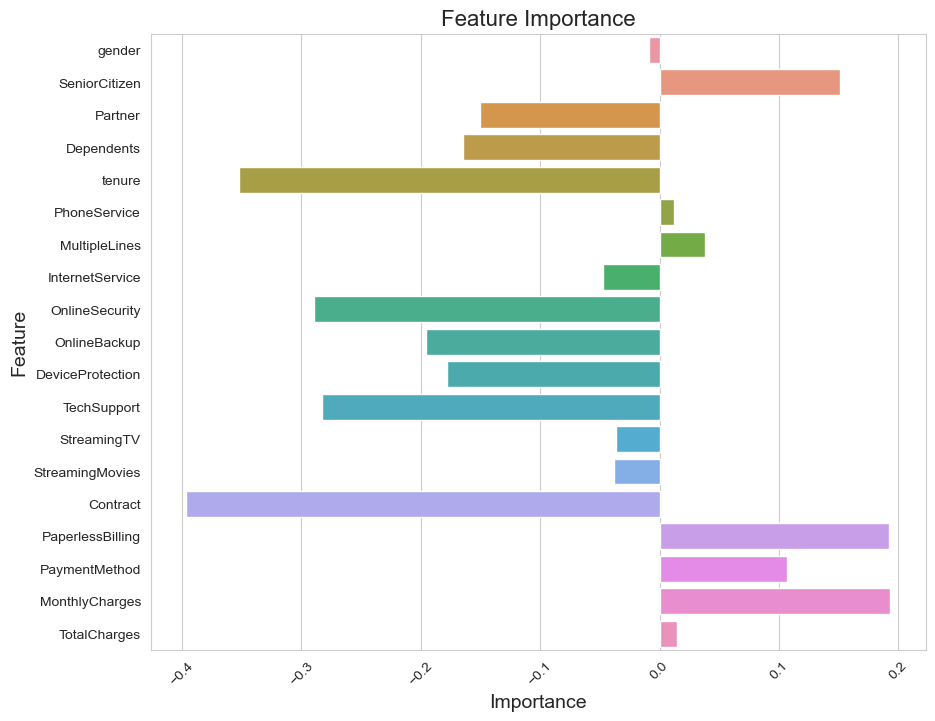

In [432]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# Plot the horizontal bar chart
sns.barplot(x='Imp', y='Columns', data=feat_imp_df)

# Add labels and title
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Correlation Matrix Heartmap

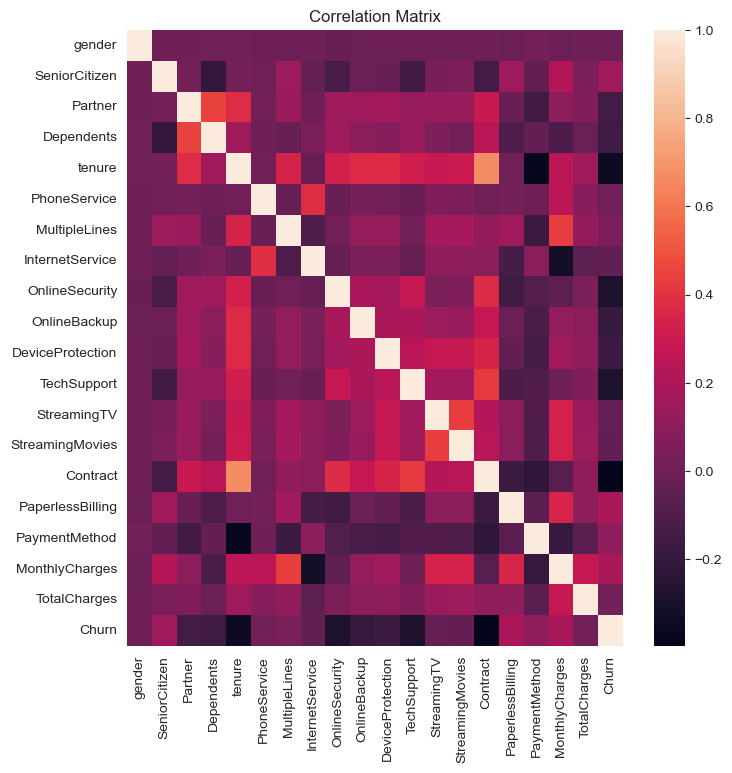

In [422]:
# Compute and plot the correlation matrix
plt.figure(figsize=(8, 8))
corr_matrix = churn.corr()
sns.heatmap(corr_matrix, annot=False)
plt.title('Correlation Matrix')
plt.show()

# Conclusion

The output appears to be a classification report, which is used to evaluate the performance of a classification model.

precision, recall, and f1-score are the evaluation metrics for each class. 
    In this case, there are two classes: 0 and 1.

1. precision is the ratio of correctly predicted positive instances to the total predicted positive instances. It              measures the model's ability to avoid false positives.
2. recall is the ratio of correctly predicted positive instances to the total actual positive instances. It measures          the model's ability to find all positive instances.
3. f1-score is the harmonic mean of precision and recall, providing a single metric that combines both.
4. accuracy is the overall accuracy of the model, which is the ratio of correctly predicted instances (both positive and      negative) to the total number of instances.

In the provided output, here's an interpretation of the values:

- For class 0:
  - The precision is 0.86, meaning that 86% of the instances predicted as class 0 are actually class 0.
  - The recall is 0.88, indicating that the model correctly identifies 88% of the actual class 0 instances.
  - The f1-score is 0.87, which is the harmonic mean of precision and recall for class 0.

- For class 1:
  - The precision is 0.60, meaning that 60% of the instances predicted as class 1 are actually class 1.
  - The recall is 0.57, indicating that the model correctly identifies 57% of the actual class 1 instances.
  - The f1-score is 0.59, which is the harmonic mean of precision and recall for class 1.

- The overall accuracy of the model is 0.80 (80%), meaning that the model correctly classified 80% of the instances in the dataset.

# hence i will use Logistic Regression model for my further Prediction